In [1]:
import pandas as pd
import numpy as np
import time
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
import sklearn as sk
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

/Users/aaronfrederick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load Dataframe
df = pd.read_pickle('master_df.pkl')

In [3]:
df.describe()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
count,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,...,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,8769.000000
mean,23.629998,0.356054,0.126500,0.200737,0.132929,0.314650,0.024915,0.073617,0.068836,0.092926,...,0.172712,0.079697,0.030395,0.019744,0.056789,0.106853,0.359609,0.108014,2008.280120,0.453822
std,12.450294,0.232994,0.214042,0.308157,0.105971,0.235503,0.054057,0.114940,0.130502,0.154885,...,0.149351,0.105866,0.113325,0.045364,0.105314,0.143405,0.280821,0.096712,5.618026,0.271328
min,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000
25%,13.870833,0.200000,0.000000,0.000000,0.059754,0.200955,0.000000,0.000000,0.000000,0.000000,...,0.074089,0.000000,0.000000,0.000000,0.000000,0.040000,0.179138,0.034642,2003.000000,0.300000
50%,24.000000,0.400000,0.000000,0.000000,0.126582,0.303638,0.000000,0.040000,0.037037,0.061053,...,0.147783,0.057143,0.000000,0.000000,0.041667,0.084181,0.337719,0.097680,2009.000000,0.500000
75%,34.000000,0.500000,0.250000,0.500000,0.190476,0.414634,0.038462,0.121212,0.107768,0.142857,...,0.243367,0.120000,0.047619,0.027829,0.083333,0.138616,0.505145,0.161204,2014.000000,0.600000
max,54.000000,0.917000,0.857000,0.944000,1.875000,15.000000,1.463415,5.454545,6.315789,6.315789,...,2.068966,5.000000,10.000000,1.621622,7.500000,7.500000,6.315789,1.875000,2017.000000,1.000000


In [4]:
df.corr()

,minutes_played,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,...,tot_r_per_mp,asst_per_mp,steals_per_mp,blocks_per_mp,turnovers_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
minutes_played,1.000000,0.500780,0.335974,0.391712,0.277134,0.144938,0.078654,0.042705,0.121400,0.109944,...,0.010182,0.139785,0.006290,0.003405,-0.011355,-0.216829,0.280717,0.259704,-0.047571,0.149219
fg_pct,0.500780,1.000000,0.296851,0.208696,0.578436,0.198014,0.181367,0.030153,0.065718,0.060649,...,0.067993,0.053221,0.000252,0.025623,-0.014245,-0.112760,0.502012,0.532442,-0.004845,0.524160
3_pct,0.335974,0.296851,1.000000,0.070129,0.243780,0.150591,0.555158,0.421374,0.013046,-0.011657,...,-0.148353,0.099702,0.012051,-0.109543,-0.010057,-0.106180,0.296915,-0.043183,0.091797,0.006989
ft_pct,0.391712,0.208696,0.070129,1.000000,0.162937,0.093718,-0.022376,-0.045640,0.328500,0.421418,...,0.080573,0.048156,0.007754,0.036366,0.024707,-0.060346,0.271324,0.191044,-0.051149,0.083985
fg_per_mp,0.277134,0.578436,0.243780,0.162937,1.000000,0.485872,0.418859,0.193459,0.084668,0.081811,...,0.087572,0.044485,0.025846,-0.000043,-0.011506,-0.047189,0.874699,0.861622,0.026546,0.550880
fga_per_mp,0.144938,0.198014,0.150591,0.093718,0.485872,1.000000,0.217105,0.376316,0.045040,0.035795,...,0.047200,0.044134,0.021057,-0.021915,-0.000562,-0.061306,0.429422,0.411040,0.023738,-0.038474
fg3_per_mp,0.078654,0.181367,0.555158,-0.022376,0.418859,0.217105,1.000000,0.613082,-0.020783,-0.044832,...,-0.116317,0.057521,-0.003444,-0.081241,-0.020511,-0.074401,0.498960,-0.099984,0.106524,-0.025507
fg3a_per_mp,0.042705,0.030153,0.421374,-0.045640,0.193459,0.376316,0.613082,1.000000,-0.032568,-0.060403,...,-0.154517,0.059020,0.001219,-0.101005,-0.013587,-0.086429,0.248889,-0.130699,0.145523,-0.034487
ft_per_mp,0.121400,0.065718,0.013046,0.328500,0.084668,0.045040,-0.020783,-0.032568,1.000000,0.925848,...,0.051403,0.003647,-0.005312,0.017246,0.004752,-0.024906,0.524615,0.104390,-0.029899,0.068734
fta_per_mp,0.109944,0.060649,-0.011657,0.421418,0.081811,0.035795,-0.044832,-0.060403,0.925848,1.000000,...,0.088499,-0.008407,-0.007111,0.026811,0.001556,-0.016607,0.483370,0.114703,-0.037336,0.077253


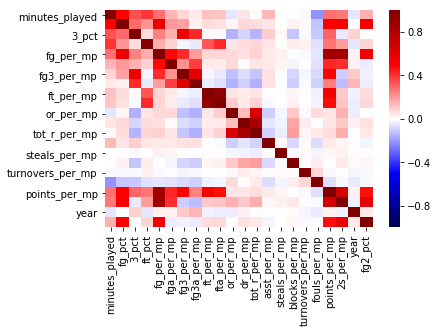

In [5]:
#Heatmap
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic')

In [6]:
#Pairplot -- currently commented out to save computation time (very slow!)
#sns.pairplot(df)

## Initial Modeling with Linear Regression
Because the data doesn't require feature reduction, I will be analyzing this data set with a 70/30 Train/Test split.  

In [7]:
#Splitting Training/Testing Data
df = df.dropna()

X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [8]:
#Modeling with scikitlearn
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.37206710124605746

In [9]:
simple_df = pd.DataFrame([model.coef_])
simple_df.columns = X.columns
simple_df.drop(columns = ['steals_per_mp','blocks_per_mp','turnovers_per_mp','tot_r_per_mp'], axis=1)

,fg_pct,3_pct,ft_pct,fg_per_mp,fga_per_mp,fg3_per_mp,fg3a_per_mp,ft_per_mp,fta_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,16.736724,16.088466,11.557598,-8.672015,-1.600013,-32.116657,8.857079,41.977545,-30.691077,-4.403864,4.61562,13.574756,-24.139549,-7.483142,23.444641,-0.133738,-2.244731


Text(0.5, 1.0, 'Model Prediction vs Testing Data')

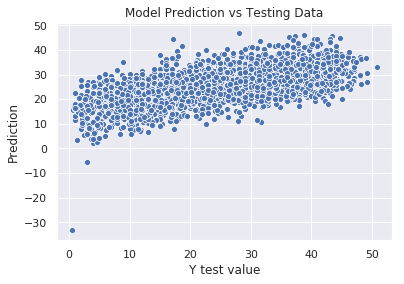

In [10]:
#Visualizing Prediction vs Actual Test Data
sns.set()
sns.scatterplot(y_test, model.predict(X_test))#, label='Linear Regression')
plt.xlabel('Y test value')
plt.ylabel('Prediction')
plt.title('Model Prediction vs Testing Data')

## Looking into playing time vs. salary
Using the analyses prior to discover which aspects of the game lead to most playing time, I'll be pursuing a dollar amount to assign to that improvement.

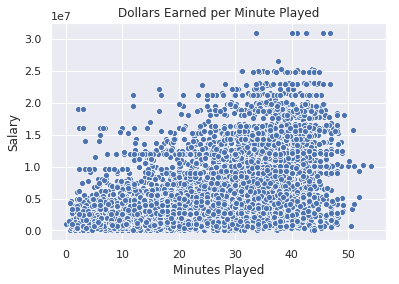

In [11]:
pay_df = pd.read_pickle('merged_df.pkl')
#pay_df
sns.scatterplot(x=pay_df['minutes_played'], y=pay_df['salary']).set_title('Dollars Earned per Minute Played')
plt.xlabel('Minutes Played')
plt.ylabel('Salary')
plt.show()

## Feature reduction on dataframe
Here we will remove the columns that appear white on the heatmap or can be calculated from other factors.
These dropped features include:
- Total rebounds per minute
- Steals per minute
- Blocks per minute
- Field goals per minute
- Field goals attempted per minute
- 3-pointers attempted per minute

In [12]:
pay_df = pay_df.drop(columns = ['tot_r_per_mp', 'steals_per_mp', 'blocks_per_mp',
                                'fg_per_mp', 'fga_per_mp', 'fg3a_per_mp', 'fta_per_mp',
                               'season_end', 'turnovers_per_mp'])
pay_df

,minutes_played,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,name,salary,team
0,37.000000,0.357,0.750,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000,"Jones,Eddie",11212500.0,MIA
1,32.000000,0.667,0.000,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385,"Butler,Caron",1678800.0,MIA
2,30.000000,0.333,0.000,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333,"Allen,Malik",512435.0,MIA
3,29.000000,0.750,0.000,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000,"Grant,Brian",11027862.0,MIA
4,2.000000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000,"Best,Travis",1400000.0,MIA
5,35.000000,0.333,0.000,0.000,0.000000,0.057143,0.000000,0.085714,0.085714,0.028571,0.285714,0.114286,2003,0.400000,"James,Mike",512435.0,MIA
6,27.000000,0.857,0.000,0.667,0.000000,0.148148,0.111111,0.370370,0.074074,0.037037,0.592593,0.222222,2003,0.857143,"Stepania,Vladimir",1350000.0,MIA
7,23.000000,0.600,0.000,0.000,0.000000,0.086957,0.000000,0.130435,0.347826,0.043478,0.347826,0.130435,2003,0.600000,"Carter,Anthony",3656250.0,MIA
8,13.000000,0.250,0.000,0.800,0.076923,0.615385,0.000000,0.000000,0.000000,0.076923,0.846154,0.000000,2003,0.000000,"Butler,Rasual",349458.0,MIA
9,6.000000,0.500,0.000,0.000,0.000000,0.000000,0.166667,0.166667,0.000000,0.500000,0.333333,0.166667,2003,0.500000,"Marks,Sean",612435.0,MIA


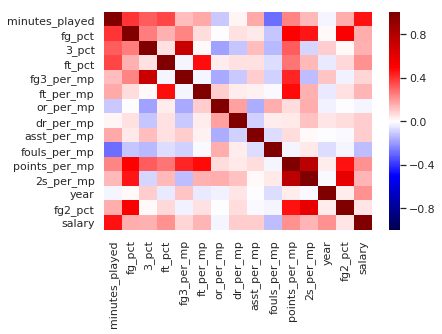

In [13]:
#New, Feature-reduced Heatmap
sns.heatmap(pay_df.corr(), vmin=-1, vmax=1, cmap='seismic')

## Examining which teams give the most playing time

In [14]:
pt_group = pay_df[['team','minutes_played']].groupby(by=['team']).median()
top5 = pt_group.sort_values(by='minutes_played', ascending=False).head()
top5['Team'] = top5.index
top5['Minutes Played Per Game'] = top5.minutes_played

In [15]:
top5

,minutes_played,Team,Minutes Played Per Game
team,,,
MIA,28.616667,MIA,28.616667
MIL,28.008333,MIL,28.008333
DAL,27.016667,DAL,27.016667
LAC,26.991667,LAC,26.991667
NOH,26.800000,NOH,26.800000


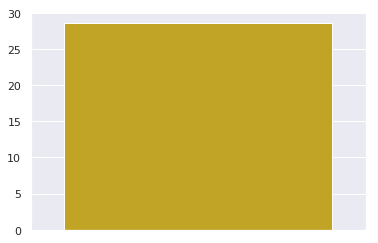

In [16]:
sns.barplot(y=top5['Minutes Played Per Game'].iloc[0], color = 'xkcd:gold')

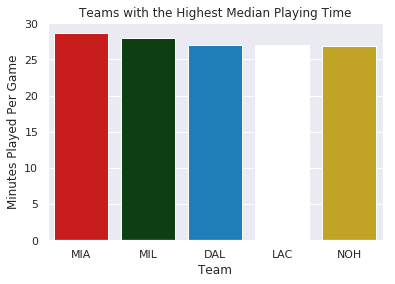

In [17]:
color_order = ['xkcd:red','xkcd:forest green','xkcd:cerulean','w','xkcd:gold']

sns.barplot(x = top5.Team,y=top5['Minutes Played Per Game'], palette=color_order).set_title('Teams with the Highest Median Playing Time')

#plt.xticks(list(top5.Team))

plt.show()

## Examining which teams give the highest median salary

In [18]:
money_group = pay_df[['team','salary']].groupby(by=['team']).median()
top10 = money_group.sort_values(by='salary', ascending=False).head(10)
top10['Team'] = top10.index
top10['Salary'] = top10.salary

In [19]:
top10

,salary,Team,Salary
team,,,
DAL,5750000.0,DAL,5750000.0
CHA,5543725.0,CHA,5543725.0
POR,4991800.0,POR,4991800.0
SAC,4546000.0,SAC,4546000.0
LAL,4420000.0,LAL,4420000.0
PHO,4250000.0,PHO,4250000.0
ORL,4235840.0,ORL,4235840.0
CLE,4172432.0,CLE,4172432.0
NYK,4131720.0,NYK,4131720.0


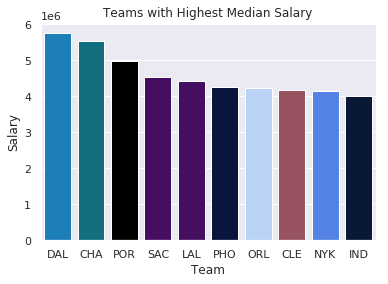

In [20]:
color_order2 = ['xkcd:cerulean', 'xkcd:ocean','xkcd:black','xkcd:royal purple','xkcd:royal purple', 'xkcd:navy blue','xkcd:powder blue', 'xkcd:light maroon', 'xkcd:lightish blue','xkcd:navy']
sns.barplot(x=top10.Team,y=top10.Salary,palette=color_order2).set_title('Teams with Highest Median Salary')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [21]:
X=pay_df.drop(columns=['minutes_played','team','name', 'salary'])
y=pay_df['minutes_played']

In [22]:
##Preps the dataframes for ML
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [23]:
#y_train

Following Visualizes Error vs. Degree polynomial

In [24]:
from sklearn.metrics import mean_squared_error
# Step through degrees from 0 to 4 and store the training and test (generalization) error.
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

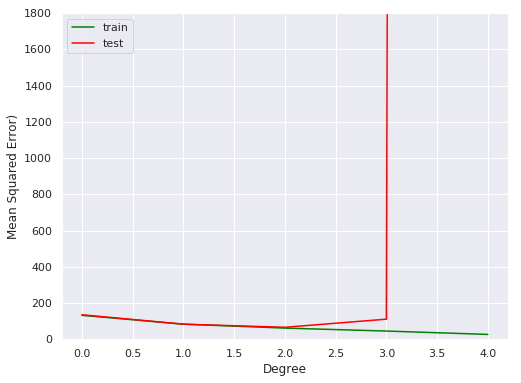

In [25]:
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
plt.ylim((0.0, 1800))
plt.ylabel('Mean Squared Error)')
plt.xlabel('Degree')
plt.legend(loc='upper left')

In [26]:
X_train.shape

(5259, 13)

In [27]:

lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
score = 0
for ratio in range(11):
    model = ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10)
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) > score:
        score = model.score(X_test,y_test)
        optimal_model = model
        optimal_ratio = ratio

print(score)
print(ratio)
#optimal_model.describe()


0.38468303301864126
10


In [28]:
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(X_train, y_train)
poly.score(X_test,y_test)

0.5101880499982716

## Momentary Breakdown

After doing an initial basic linear model, I found the R2 score to be 0.37.
After modeling using polynomial features of degree 2, R2 became 0.41.
According to ElasticNet Cross-Validation, the optimal lambda value is 1000 and L1-L2 ratio is 1:0 (entirely L1, or Lasso regularization), the R2 value was 0.40.
Below, using a polynomial of degree 2 and alpha values of 1 with Lasso regularization (alpha=1000 proved to be suboptimal), the R2 value is 0.43.

In [29]:
model2 = make_pipeline(PolynomialFeatures(2),ElasticNetCV(alphas=[0],l1_ratio=1))
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5101463769732226

In [30]:
model2.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
  ('elasticnetcv',
   ElasticNetCV(alphas=[0], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
          l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
          positive=False, precompute='auto', random_state=None,
          selection='cyclic', tol=0.0001, verbose=0))],
 'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False),
 'elasticnetcv': ElasticNetCV(alphas=[0], copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'elasticnetcv__alphas': [0],
 'elasticnetcv__copy_X': True,
 'elast

## Below we go into modeling using the log(minutes played)
This is largely more successful than the previous tactics for modeling, increasing the R2 value to 0.52! This is almost a 50% improvement from the initial score of 0.37.

In [31]:
##Experimenting with log_pt
import math
log_pt_list = []
for item in pay_df.minutes_played:
    log_pt_list.append(math.log10(item))

pay_df['log_pt'] = log_pt_list
pay_df.head()

,minutes_played,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,name,salary,team,log_pt
0,37.0,0.357,0.75,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000,"Jones,Eddie",11212500.0,MIA,1.568202
1,32.0,0.667,0.00,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385,"Butler,Caron",1678800.0,MIA,1.505150
2,30.0,0.333,0.00,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333,"Allen,Malik",512435.0,MIA,1.477121
3,29.0,0.750,0.00,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000,"Grant,Brian",11027862.0,MIA,1.462398
4,2.0,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000,"Best,Travis",1400000.0,MIA,0.301030


In [32]:
X=pay_df.drop(columns=['minutes_played','team','name', 'salary','log_pt'])
y=pay_df['log_pt']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [33]:
poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly.fit(X_train, y_train)
poly.score(X_test,y_test)

0.34436919394422427

In [34]:
lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
score = 0
for ratio in range(11):
    model = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10))
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) > score:
        score = model.score(X_test,y_test)
        optimal_model = model
        optimal_ratio = ratio

print(score)
print(optimal_ratio)


0.04118587189000089
0


In [35]:
optimal_model.named_steps['elasticnetcv'].alpha_

10000.0

In [36]:

model2 = make_pipeline(PolynomialFeatures(3),ElasticNetCV(alphas=[0.1],l1_ratio=0.2))
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.12233367664221784

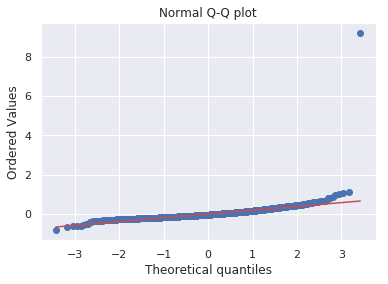

In [37]:
##Plot the residuals  -- ask about this because it was scaled..
import scipy.stats as stats
#resid = 10**model2.predict(X_test)-10**y_test
#stats.probplot(resid, dist="norm", plot=plt)
log_resid = model2.predict(X_test)-y_test
stats.probplot(log_resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [38]:
#dir(model2)
model2.named_steps['elasticnetcv'].coef_

array([ 0.00000000e+00,  0.00000000e+00,  2.04377060e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.72310378e-04, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.43387680e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.77056430e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.61986046e-03, -0.00000000e+00,
       -0.00000000e+00, -

In [39]:
power_df = pd.DataFrame(model2.named_steps['polynomialfeatures'].powers_)
#power_df

In [40]:
power_df['coefficients'] = model2.named_steps['elasticnetcv'].coef_
power_df.sample(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,coefficients
14,2,0,0,0,0,0,0,0,0,0,0,0,0,-0.014339
524,0,0,0,0,0,0,0,1,0,0,0,0,2,0.000000
347,0,0,0,2,0,0,0,0,0,0,1,0,0,0.000000
97,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.000000
296,0,0,1,0,1,1,0,0,0,0,0,0,0,-0.000000
539,0,0,0,0,0,0,0,0,1,0,0,0,2,0.000000
284,0,0,2,0,0,0,0,0,0,0,0,0,1,0.000000
340,0,0,0,3,0,0,0,0,0,0,0,0,0,-0.000418
496,0,0,0,0,0,0,1,0,0,1,0,1,0,0.000000
74,0,0,0,0,0,1,0,0,0,0,1,0,0,-0.000000


In [41]:
X.head()

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.357,0.75,0.875,0.081081,0.189189,0.000000,0.081081,0.054054,0.054054,0.540541,0.054054,2003,0.200000
1,0.667,0.00,0.750,0.062500,0.093750,0.031250,0.031250,0.093750,0.093750,0.781250,0.250000,2003,0.615385
2,0.333,0.00,0.000,0.000000,0.066667,0.066667,0.133333,0.033333,0.100000,0.266667,0.100000,2003,0.333333
3,0.750,0.00,0.500,0.000000,0.034483,0.068966,0.137931,0.000000,0.103448,0.241379,0.103448,2003,0.750000
4,0.000,0.00,0.000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2003,0.000000


In [42]:
X.columns

Index(['fg_pct', '3_pct', 'ft_pct', 'fg3_per_mp', 'ft_per_mp', 'or_per_mp',
       'dr_per_mp', 'asst_per_mp', 'fouls_per_mp', 'points_per_mp',
       '2s_per_mp', 'year', 'fg2_pct'],
      dtype='object')

In [43]:
newnames = list(X.columns)
newnames.append('coefficients')
power_df.columns = newnames
power_df.head()

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0.002044
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000000


In [44]:
power_df.drop(columns=['fg3_per_mp','ft_per_mp','or_per_mp','2s_per_mp','year'], axis=1)
power_df.sort_values('coefficients', ascending=False).head(25)

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
105,3,0,0,0,0,0,0,0,0,0,0,0,0,0.016166
274,0,0,3,0,0,0,0,0,0,0,0,0,0,0.016067
268,0,1,0,0,0,0,0,0,0,0,2,0,0,0.010133
189,1,0,0,0,0,0,0,0,0,1,0,0,1,0.008125
312,0,0,1,0,0,0,2,0,0,0,0,0,0,0.007976
246,0,1,0,0,0,0,2,0,0,0,0,0,0,0.005446
111,2,0,0,0,0,0,1,0,0,0,0,0,0,0.004775
253,0,1,0,0,0,0,0,2,0,0,0,0,0,0.003936
476,0,0,0,0,0,0,3,0,0,0,0,0,0,0.003101
168,1,0,0,0,0,0,2,0,0,0,0,0,0,0.002971


In [45]:
power_df.sort_values('coefficients').head(11)

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct,coefficients
90,0,0,0,0,0,0,0,0,2,0,0,0,0,-0.028687
104,0,0,0,0,0,0,0,0,0,0,0,0,2,-0.025405
77,0,0,0,0,0,0,2,0,0,0,0,0,0,-0.024957
14,2,0,0,0,0,0,0,0,0,0,0,0,0,-0.014339
101,0,0,0,0,0,0,0,0,0,0,1,0,1,-0.014237
69,0,0,0,0,0,2,0,0,0,0,0,0,0,-0.013734
60,0,0,0,0,2,0,0,0,0,0,0,0,0,-0.011668
84,0,0,0,0,0,0,0,2,0,0,0,0,0,-0.006909
99,0,0,0,0,0,0,0,0,0,0,2,0,0,-0.004862
50,0,0,0,2,0,0,0,0,0,0,0,0,0,-0.002620


Text(0.5, 1.0, 'Correlations between log(minutes played) and gameplay features')

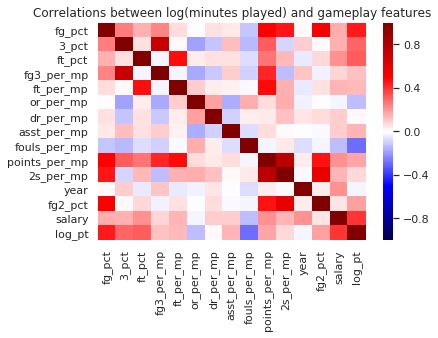

In [46]:
sns.heatmap(pay_df.drop(columns='minutes_played').corr(), vmin=-1, vmax=1, cmap='seismic').set_title('Correlations between log(minutes played) and gameplay features')

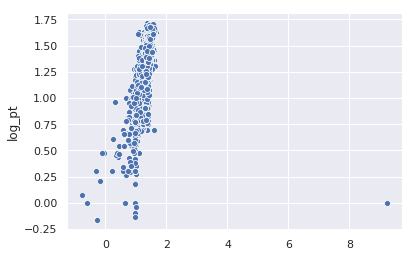

In [47]:
sns.scatterplot(x=model2.predict(X_test),y=y_test)

In [48]:
model3 = LinearRegression()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.3990686781103315

In [49]:
simple_df3 = pd.DataFrame([model3.coef_])
simple_df3.columns = X.columns
simple_df3

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.121739,0.083311,0.064239,-3.291469e+11,-2.296641e+11,-0.016472,0.009245,0.018332,-0.05196,6.184728e+11,-4.819413e+11,-0.010183,0.003212


In [50]:
lambdas = [0.01,0.1,0,1, 10, 100, 1000, 10000, 100000]
score = 0
for ratio in range(11):
    model = ElasticNetCV(alphas=lambdas,l1_ratio=ratio/10)
    model.fit(X_train,y_train)
    if model.score(X_test,y_test) > score:
        score = model.score(X_test,y_test)
        optimal_model = model
        optimal_ratio = ratio

print(score)
print(optimal_ratio)

0.3990027240749994
1


In [51]:
optimal_model.coef_

array([ 0.12081023,  0.08376226,  0.06482765, -0.04501778,  0.01541002,
       -0.01666375,  0.00921754,  0.0182315 , -0.05195002, -0.03950126,
       -0.01579081, -0.01000563,  0.00314528])

In [73]:
simple_df4 = pd.DataFrame([optimal_model.coef_])
simple_df4.columns = X.columns
simple_df4

,fg_pct,3_pct,ft_pct,fg3_per_mp,ft_per_mp,or_per_mp,dr_per_mp,asst_per_mp,fouls_per_mp,points_per_mp,2s_per_mp,year,fg2_pct
0,0.12081,0.083762,0.064828,-0.045018,0.01541,-0.016664,0.009218,0.018232,-0.05195,-0.039501,-0.015791,-0.010006,0.003145


## Neural Net Experimentation!

In [52]:
from sklearn import neural_network
import multiprocessing as multi

In [53]:
def nn_train(alphas):
    top_score = 0
    count = 0
    hyper_params = []
    for alpha in alphas:
        for i in range(1,9):
            for j in range(1,9):
                for k in range(1,9):
                    model = neural_network.MLPRegressor((i,j,k), alpha=alpha)
                    model.fit(X=X_train,y=y_train)
                    if model.score(X=X_test,y=y_test) > top_score:
                        top_score = model.score(X=X_test,y=y_test)
                        opt_nn = model
                        hyper_params = [(i,j,k),alpha]
                    print(count + 1)
                    count += 1
    print(top_score)
    print(hyper_params)
                        

def workload(n,alphas):
    return np.array_split(alphas,n)

def main():
    cpus = multi.cpu_count()
    alphas = [0.001,0.01,0.1,0,1,10,100]
    chunks = workload(cpus,alphas)
    workers = []
    for cpu in range(cpus):
        worker = multi.Process(name=str(cpu),
                               target=nn_train, #target function
                               args=(chunks[cpu],)) #Workload per processer 
        worker.start()
        workers.append(worker)

    for worker in workers:
        worker.join()

main()

0


Process 7:
Traceback (most recent call last):
  File "/Users/aaronfrederick/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/aaronfrederick/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-53-8d7388ca9afa>", line 17, in nn_train
    print(hyper_params)
UnboundLocalError: local variable 'hyper_params' referenced before assignment


1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
4
4
4
3
4
5
5
5
6
7
6
7
5
4
6
8
4
8
6
7
3
9
9
7
5
6
10
7
5
10
8
8
11
11
8
9
9
12
12
4
6
10
13
13
10
9
14
14
11
10
15
12
5
15
11
16
12
16
6
13
11
17
13
17
18
7
12
14
19
14
18
13
15
15
20
19
7
16
14
8
16
15
20
21
17
16
22
21
8
17
9
18
17
22
23
10
23
18
24
18
24
19
19
20
19
9
20
11
25
25
21
21
20
22
26
22
23
26
23
10
24
27
27
12
21
28
24
25
28
29
13
25
26
30
27
22
31
28
11
26
14
32
29
23
29
33
24
30
30
15
31
31
27
12
25
32
28
32
16
33
34
13
35
33
26
36
29
17
34
34
37
27
35
30
38
35
14
31
36
36
28
37
39
40
29
32
38
18
33
39
41
40
37
15
30
34
19
35
38
31
36
16
39
41
42
32
37
42
43
44
40
38
20
33
41
43
39
17
45
42
34
46
40
18
43
41
21
44
44
35
45
45
47
46
19
48
36
46
42
47
47
49
48
48
43
49
37
50
49
22
50
44
51
51
52
38
20
50
45
51
46
39
53
23
47
52
40
54
53
52
21
55
24
48
56
57
54
41
53
58
54
59
55
42
22
56
55
43
49
25
60
56
57
61
58
50
57
44
58
51
62
23
59
52
59
45
26
53
63
60
60
61
64
46
54
27
62
55
24
56
47
65
57
61
28
62
58
63
66
63
59
67
60
64
48
6

385
384
302
388
363
225
198
389
303
226
364
385
386
365
304
386
387
390
199
366
387
391
227
388
388
228
389
392
367
393
390
305
389
200
394
229
368
201
391
390
395
306
392
369
393
391
230
396
394
202
307
392
397
395
370
308
398
393
231
396
203
394
309
371
204
232
397
399
395
310
372
233
205
398
396
400
311
399
234
397
373
400
312
374
398
206
401
399
235
375
401
313
376
400
402
207
402
403
377
236
401
314
378
403
404
237
404
208
402
379
405
315
405
380
406
209
381
316
403
406
210
238
407
382
407
404
211
383
408
239
317
408
405
384
212
318
406
409
385
409
407
240
410
319
408
386
213
411
387
410
388
320
241
412
411
321
409
214
242
412
389
413
413
410
414
390
322
414
391
411
243
215
415
412
415
392
323
413
416
324
416
325
216
414
417
244
326
217
415
393
417
327
416
394
245
418
418
417
328
419
246
418
419
218
420
329
420
395
421
419
247
330
396
422
421
420
331
219
423
248
397
422
421
424
332
423
425
398
333
422
424
426
249
220
399
423
425
334
400
424
250
426
427
427
221
335
425
428
251
401


Process 6:
Traceback (most recent call last):
  File "/Users/aaronfrederick/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/aaronfrederick/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-53-8d7388ca9afa>", line 17, in nn_train
    print(hyper_params)
UnboundLocalError: local variable 'hyper_params' referenced before assignment


489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
0.3400083135881523
[(1, 4, 1), 10.0]


In [54]:
#1,4,1 alpha = 10 score is 0.34
#7,8,8 alpha = 1.0 score is 0.63
#8,6,3 alpha = 0.1 score is 0.67
#7,5,4 alpha = 0.01 score is 0.62
#8,7,8 alpha = 0.001 score is 0.64
#8,4,7 alpha = 0 score is 0.64

nnmodel = neural_network.MLPRegressor((8,6,3), alpha = 0.1)
nnmodel.fit(X=X_train,y=y_train)
nnmodel.score(X=X_test,y=y_test)

0.64107159107026

In [57]:
def nn_train(alphas):
    top_score = 0
    count = 0
    hyper_params = []
    for alpha in alphas:
        for i in range(1,9):
            for j in range(1,9):
                for k in range(1,9):
                    for l in range(1,9):
                        model = neural_network.MLPRegressor((i,j,k), alpha=alpha)
                        model.fit(X=X_train,y=y_train)
                        if model.score(X=X_test,y=y_test) > top_score:
                            top_score = model.score(X=X_test,y=y_test)
                            opt_nn = model
                            hyper_params = [(i,j,k,l),alpha]
                        print(count + 1)
                        count += 1
    print(top_score)
    print(hyper_params)
                        

def workload(n,alphas):
    return np.array_split(alphas,n)

def main():
    cpus = multi.cpu_count()
    alphas = [0.001,0.01,0.1,0,1]
    chunks = workload(cpus,alphas)
    workers = []
    for cpu in range(cpus):
        worker = multi.Process(name=str(cpu),
                               target=nn_train, #target function
                               args=(chunks[cpu],)) #Workload per processer 
        worker.start()
        workers.append(worker)

    for worker in workers:
        worker.join()

main()

0
0
[]
[]
0
[]
1
1
1
1
1
2
2
2
2
3
3
3
3
2
4
4
4
4
5
5
5
5
6
3
6
6
7
6
7
7
7
8
8
8
4
8
9
9
9
5
10
10
9
10
6
10
11
11
11
7
12
12
12
13
13
13
8
11
12
9
14
15
14
10
14
13
14
15
11
15
15
16
12
17
16
16
17
17
16
18
17
18
18
13
19
18
19
19
14
19
20
20
20
21
15
21
20
22
21
23
21
22
22
22
24
16
23
23
23
24
24
25
25
24
26
25
26
17
25
26
27
26
27
18
27
28
28
27
29
28
19
30
28
29
29
30
29
30
31
32
20
30
31
31
33
31
34
32
32
35
36
21
33
37
34
33
32
38
34
39
33
40
22
41
34
35
35
36
36
35
23
37
37
36
24
42
38
38
43
39
25
37
44
40
26
45
38
39
46
40
39
47
41
27
41
42
48
40
49
28
41
42
29
42
50
43
43
51
44
52
44
43
45
53
44
54
45
30
46
45
46
47
55
47
46
31
48
49
56
32
50
47
48
51
48
49
57
33
49
52
53
50
54
34
50
58
51
35
59
55
36
52
51
60
53
54
37
56
61
62
38
55
52
57
53
63
58
56
54
39
59
64
57
60
58
55
40
59
61
65
60
41
56
61
62
66
62
63
42
67
63
57
64
68
43
64
65
65
44
69
58
66
70
66
59
71
45
72
60
67
67
61
73
46
68
62
47
68
63
74
64
48
65
66
75
69
49
69
67
76
68
70
50
70
69
51
77
70
71
78
52
72
53
7

474
345
454
469
475
443
346
470
444
445
455
347
476
446
477
456
348
447
471
478
472
457
479
349
448
458
449
473
480
350
481
450
482
459
351
483
474
460
352
451
475
484
461
485
476
462
486
353
477
463
452
354
487
464
478
453
465
355
479
454
488
466
489
455
356
456
490
467
457
491
458
480
459
492
493
357
460
468
494
481
461
469
358
495
470
482
462
471
496
359
463
497
472
473
483
498
474
499
484
485
360
500
464
475
501
476
486
361
502
477
465
362
503
478
487
466
488
504
363
505
479
506
467
480
489
507
468
364
508
490
481
469
509
482
491
483
510
365
470
511
484
492
366
512
493
471
485
367
513
494
486
472
514
473
515
495
487
516
368
488
496
474
517
475
518
497
489
476
369
519
498
490
370
477
491
371
520
499
492
372
500
493
521
501
478
494
502
373
503
479
504
480
522
495
496
523
505
374
497
506
524
481
375
498
525
507
499
482
500
508
483
509
376
501
484
510
502
485
526
486
503
511
527
377
504
487
378
528
512
529
505
513
488
379
514
489
506
515
490
516
380
507
491
530
492
508
517
531
381
493


872
896
897
692
907
873
898
899
867
908
693
909
874
868
694
900
869
875
870
901
876
910
695
911
871
696
877
912
872
902
913
878
873
697
914
879
874
915
903
916
880
904
875
698
881
905
876
882
699
917
906
883
918
907
700
884
877
908
885
701
878
909
886
879
702
919
880
910
887
703
881
920
888
889
911
704
921
882
912
890
705
922
913
883
891
923
914
884
706
924
892
915
893
925
885
926
707
894
886
927
916
895
887
917
708
896
888
928
918
897
709
889
890
929
898
710
930
891
711
919
931
892
932
920
899
893
921
933
712
894
900
713
922
895
934
901
923
714
896
924
935
902
897
925
715
936
903
926
937
716
898
927
938
904
899
939
928
717
905
900
929
940
930
901
718
941
931
719
906
942
932
943
720
907
933
902
908
944
934
909
935
903
721
945
910
904
911
905
722
946
906
912
936
947
723
907
913
948
937
908
914
724
949
938
909
950
915
910
951
916
917
939
725
952
911
918
953
912
940
919
954
913
726
941
920
914
727
921
955
942
915
956
922
916
943
728
957
944
923
917
729
945
958
946
730
959
918
947
924
960


1283
1285
1248
1286
970
1284
971
1287
1249
1285
1234
1235
972
1288
1286
1250
973
1289
1236
1290
974
1251
1287
1291
975
1252
1237
1253
1292
1288
1238
1293
1254
976
1289
1239
1255
1294
1240
1290
1256
1295
1291
977
1257
1241
1258
1292
1242
1296
978
1259
1243
1297
979
1298
1244
1260
1293
1299
1245
1261
980
1300
1294
1262
981
1263
1246
1301
1295
1264
1302
1247
1296
1265
982
1266
1297
1248
1303
1267
1298
1249
983
1304
1299
1268
1305
984
1300
1250
1301
1269
985
1306
1251
1270
1302
986
1307
1303
1252
1271
1308
987
1253
1304
1272
1309
988
1254
1305
1310
989
1273
1255
1311
1306
1274
1312
1256
1307
1275
1257
990
1313
1276
1314
1308
1258
1277
991
1309
1278
1259
992
1279
1310
1260
1315
1280
1261
1311
1316
1262
1312
993
1317
1313
1263
1318
994
1281
1282
1319
1264
1283
1284
995
1265
1320
1314
996
1315
1321
1285
1266
997
1286
1316
1267
1322
1287
1288
1317
998
1323
1268
1289
999
1318
1290
1269
1319
1324
1270
1000
1325
1291
1320
1326
1001
1321
1292
1271
1322
1327
1272
1293
1002
1328
1323
1294
1273
1003


1244
1602
1627
1636
1603
1628
1245
1556
1637
1604
1557
1629
1630
1638
1246
1631
1639
1558
1247
1559
1605
1640
1632
1560
1248
1641
1633
1642
1561
1634
1606
1643
1644
1249
1562
1563
1645
1607
1564
1608
1565
1646
1635
1250
1566
1647
1636
1567
1648
1609
1637
1568
1569
1251
1649
1638
1610
1570
1650
1611
1639
1612
1252
1651
1640
1571
1253
1652
1613
1614
1641
1653
1572
1254
1654
1573
1642
1655
1255
1574
1656
1615
1643
1575
1657
1576
1256
1644
1577
1616
1658
1578
1257
1645
1659
1579
1258
1617
1660
1646
1259
1580
1661
1581
1647
1582
1260
1618
1648
1662
1583
1619
1649
1584
1261
1620
1663
1650
1664
1585
1621
1262
1586
1665
1587
1651
1622
1666
1588
1652
1263
1623
1589
1624
1590
1667
1653
1625
1264
1591
1654
1668
1626
1592
1669
1670
1627
1655
1265
1593
1656
1628
1671
1266
1629
1657
1594
1630
1595
1658
1596
1631
1659
1267
1672
1660
1632
1268
1597
1673
1661
1598
1633
1674
1269
1599
1662
1634
1675
1600
1663
1676
1601
1635
1664
1665
1270
1677
1666
1667
1602
1636
1271
1678
1668
1637
1669
1679
1603
1670


1892
1500
1972
1951
1501
1893
1973
1952
1989
1974
1894
1953
1990
1975
1502
1954
1895
1991
1503
1976
1992
1896
1955
1977
1993
1956
1897
1957
1978
1504
1994
1898
1979
1995
1958
1899
1980
1996
1505
1959
1960
1506
1997
1981
1900
1998
1961
1999
1962
1901
1982
1507
1963
2000
1983
1902
1508
2001
1964
1984
1903
2002
1965
1509
1904
2003
1985
1966
1905
1986
2004
1510
1906
1967
2005
1968
1987
1907
2006
1511
1969
2007
1988
1908
1970
2008
1512
1909
2009
1971
1910
1989
2010
1513
1972
1911
2011
1990
1973
2012
1991
1912
1514
2013
1974
1992
1913
2014
1515
1993
1975
1914
1994
2015
1976
1516
1915
2016
1977
1517
1916
1995
2017
1978
1996
1917
2018
1518
1979
1997
2019
1980
1998
1918
2020
1981
1999
1519
1919
2021
2000
1982
1920
2022
2001
1520
2023
1921
1521
2002
1983
2024
2003
1522
1984
2025
1922
1985
2004
1923
1986
2005
1523
2026
1987
2027
2006
1988
2028
1524
1989
2007
1924
1925
1990
2029
1991
2030
2008
1525
2009
1926
2031
1526
2010
1927
2032
1527
1992
2011
2033
2012
1993
1928
1528
2034
2013
2035
1994
1529


2216
2295
2345
2217
1768
2296
2346
2319
2297
2347
2218
1769
2320
2298
2348
2219
2321
2299
2349
2322
1770
2300
2220
2350
2323
2301
2221
2351
1771
2324
2302
2222
2352
2325
2303
2353
2304
2326
2223
2354
1772
2224
2327
2305
2355
2306
2328
2225
1773
2356
2307
2226
2329
2357
1774
2308
2227
2330
1775
2358
2228
2331
2309
2359
1776
2229
2310
2332
2360
2361
2230
2333
2311
2312
2362
1777
2231
2363
2313
2334
2232
2364
2314
1778
2233
2365
2335
2234
2366
2315
1779
2336
2316
2235
2367
2317
1780
2318
2337
2236
1781
2368
2237
2319
2338
2369
2238
1782
2320
2370
2339
2371
2321
2239
1783
2322
2340
2372
2240
2241
2373
2323
2341
1784
2374
2242
2324
1785
2342
2375
2325
2243
2343
2376
2326
2344
2244
1786
2327
2345
2245
2328
2346
2377
2347
1787
2329
2348
2378
2330
1788
2246
2349
2247
1789
2331
2350
2248
2379
2332
2249
2351
1790
2250
2352
2333
2251
1791
2353
2380
2334
1792
2252
2335
2381
2354
2336
2253
2382
1793
2355
2337
2383
2254
2356
2338
1794
2384
2357
2255
2358
2339
2385
2359
2360
2340
2386
1795
2256
2361


2670
2555
2671
2010
2651
2696
2556
2672
2652
2673
2011
2697
2557
2653
2558
2698
2674
2559
2654
2699
2012
2675
2655
2560
2676
2013
2656
2700
2561
2677
2657
2701
2014
2562
2678
2658
2702
2679
2563
2659
2015
2680
2564
2681
2660
2016
2565
2682
2703
2704
2661
2566
2683
2017
2684
2567
2662
2568
2018
2705
2569
2685
2663
2019
2686
2706
2570
2664
2687
2707
2665
2688
2020
2571
2708
2666
2572
2689
2667
2709
2021
2668
2690
2710
2669
2573
2022
2691
2574
2575
2670
2711
2692
2023
2671
2712
2672
2693
2576
2713
2024
2577
2694
2673
2025
2674
2578
2714
2695
2715
2675
2579
2026
2696
2716
2697
2676
2580
2581
2698
2027
2677
2717
2678
2699
2582
2718
2028
2719
2583
2700
2679
2029
2720
2701
2680
2584
2030
2681
2721
2702
2585
2682
2722
2703
2586
2031
2683
2587
2723
2684
2588
2724
2685
2589
2032
2704
2725
2686
2590
2705
2726
2033
2687
2591
2706
2727
2592
2688
2728
2707
2593
2689
2034
2594
2690
2708
2729
2691
2730
2595
2035
2709
2596
2692
2731
2710
2036
2597
2732
2693
2598
2037
2711
2694
2599
2733
2734
2695
2712


2895
2993
3012
2896
3036
2285
2994
2897
3013
3037
2286
2995
2287
2898
3038
2996
3039
3014
2899
2288
2997
3015
3040
2900
3041
2998
3016
2901
2999
3017
2289
3042
3000
3043
3001
2290
3018
2902
3044
3002
3019
2291
3003
2903
3045
2904
3004
3046
2292
3020
3005
2905
3047
2293
3021
3048
3006
3049
2906
3007
3022
2294
3050
2907
3008
3023
2908
3051
3024
3009
2295
3052
2909
2296
3010
3053
2910
2297
3054
3025
2911
3011
3026
2912
3055
3012
3027
3056
2298
3028
2913
3013
2299
3057
3014
3029
3058
2914
2300
3030
3015
3059
3031
2915
3060
3032
2301
3061
3033
2916
2302
3016
3062
2303
2917
3034
3017
3063
2304
3018
3035
3064
3019
2918
2305
3065
3036
3020
2919
3066
3037
3067
2920
2306
3021
2921
3068
3038
3022
3069
3039
3023
2922
3070
2307
3024
3040
3071
2923
3072
3041
2308
2924
3042
3073
3025
3043
2309
3074
2925
3044
3075
2926
3076
2927
3045
3077
2310
3026
3078
3027
2311
2928
3046
3079
2312
2313
3028
2929
3047
3080
3048
3029
3081
2930
3030
3049
2314
3031
2315
2931
3082
3050
3032
2932
3083
3033
3051
2316
3084


2533
3349
3216
3366
3396
3350
3217
3397
3367
2534
3351
3398
3218
3368
3399
3400
3219
3352
3369
2535
3353
3401
3354
3220
3402
3370
3355
2536
3371
3403
3221
3356
3372
2537
3222
3404
3357
3405
3373
3223
3358
2538
3374
3359
3406
2539
3375
3360
3224
3407
3376
3361
3408
2540
3225
3377
3362
3409
3226
3378
2541
3363
3227
3410
3379
3364
3411
3380
3228
3365
3412
2542
3381
3229
3366
3413
3382
2543
3230
3367
3383
3414
2544
3415
3368
3384
3231
3416
3385
3369
2545
3232
3386
3417
3233
3370
2546
3418
3387
3371
3419
2547
3372
3234
3388
3420
3373
3421
3389
2548
3374
3235
3422
3390
3375
3236
3423
3376
3391
2549
3237
3424
3377
3392
3425
3393
3378
3238
2550
3426
3239
3394
3379
2551
3395
3427
3396
3380
3240
3397
3381
2552
3428
3241
3429
3382
2553
3398
3242
3430
3383
3399
3243
3431
2554
3244
3384
3400
3432
2555
3385
3433
3245
3401
3246
3434
2556
3386
3402
3247
3435
3387
3403
3388
2557
3248
3436
3404
3249
3437
3389
2558
3250
3405
3438
3390
3251
3439
3391
2559
3406
3392
3440
3252
3393
3441
2560
3407
3253
2561


2801
3751
3712
3530
3713
3705
2802
3752
3531
3706
3753
3707
3754
3532
2803
3755
3714
3708
3533
3709
3756
3715
3534
3757
2804
3710
3716
3758
3535
2805
3711
3759
3717
3536
3712
3760
2806
3718
3713
3537
3714
3761
2807
3715
3762
3538
3719
2808
3763
3539
3540
3764
2809
3720
3716
3765
3541
3721
3766
2810
3717
3718
3767
3542
2811
3722
3768
3543
3719
3723
2812
3720
3724
3769
3544
3721
3725
3770
3722
3545
2813
3771
3726
3723
3546
2814
3724
3772
3727
3725
3773
3547
2815
3728
3774
3548
2816
3726
3729
3775
3727
3549
3730
3776
2817
3550
3728
3731
2818
3729
3551
3732
3777
3730
3733
3778
2819
3779
3552
3731
2820
3780
3734
3553
3732
2821
3735
3554
3781
2822
3733
3555
2823
3782
2824
3734
3556
3736
3783
3735
3557
3784
3737
3736
3558
2825
3738
3785
3737
3559
3739
3786
3738
3740
3560
3739
3741
2826
3561
3787
3742
2827
3740
3562
3741
3788
3743
2828
2829
3563
3744
3789
3742
3743
3745
3744
3790
3746
3564
2830
3745
3565
2831
3791
3746
3566
3747
3792
3747
2832
3567
3748
3793
3748
3749
3568
2833
3749
3794
3750


3858
4070
4062
3859
4071
4063
3043
3860
4072
4064
4073
3044
4074
4065
3861
4075
4066
4076
3045
3862
4077
4067
3863
4078
3046
4068
4079
4069
4080
3864
4081
4070
3865
3047
4071
4082
4072
4083
3866
3048
4073
4084
3867
4074
3049
3868
4085
3050
4075
3869
4076
4086
3870
4077
4087
3051
3871
4078
4088
3872
4079
4089
3873
4090
4080
3052
3874
4091
4081
4092
4082
3875
4093
3053
3876
4094
3877
4083
4095
3054
4096
0.6423920706768974
[(8, 6, 1, 1), 0.0]
3878
4084
3879
4085
3880
3055
4086
3881
4087
3056
3882
4088
3057
3883
4089
4090
3058
3884
4091
3885
4092
3059
3886
4093
3887
4094
3060
3888
4095
3061
4096
0.6400762757016786
[(7, 2, 2, 3), 0.001]
3889
3890
3062
3891
3892
3063
3893
3894
3064
3895
3896
3065
3897
3066
3898
3899
3067
3900
3901
3068
3902
3069
3903
3904
3070
3905
3071
3906
3072
3907
3073
3908
3909
3910
3074
3911
3912
3075
3913
3914
3076
3915
3916
3077
3917
3078
3079
3918
3919
3080
3081
3082
3920
3083
3084
3921
3085
3922
3923
3086
3924
3087
3088
3925
3926
3089
3927
3090
3091
3928
3092
3929


In [72]:
# alpha = 0.01 (8,8,4,3) score = 0.65
# alpha = 0.1 (8,7,8,4) score = 0.68         2 is good (5-0.64)
nn_model2 = neural_network.MLPRegressor((8,7,8,5), alpha=0.1)
nn_model2.fit(X=X_train,y=y_train)
nn_model2.score(X=X_test,y=y_test)

0.5808073958898929